#E-Commerce Shopee

In [ ]:
import pandas as pd
df= pd.read_csv("/content/shopee_review_analysis.csv")
df.head()

,Unnamed: 0,userName,score,content,at,cleaned_content,sentiment
0,0,Pengguna Google,4,Entahlah kenapa shopee yg sekarang pengirimann...,2024-12-16 08:39:35,shopee pengirimannya udah engga segercep pesen...,Positive
1,1,Pengguna Google,5,Mantap,2024-12-16 08:39:13,mantap,Positive
2,2,Pengguna Google,5,Top,2024-12-16 08:38:24,top,Positive
3,3,Pengguna Google,5,Kenapa Di Shoppe Ituh Selalu Sama Pengiriman N...,2024-12-16 08:37:59,shoppe ituh pengiriman samgat lambat perbaiki,Positive
4,4,Pengguna Google,5,Sangat puas dengan paket yg dkirim,2024-12-16 08:37:22,puas paket dkirim,Positive


In [ ]:
df = df.drop(['userName'], axis=1)
df.head(1)

,Unnamed: 0,score,content,at,cleaned_content,sentiment
0,0,4,Entahlah kenapa shopee yg sekarang pengirimann...,2024-12-16 08:39:35,shopee pengirimannya udah engga segercep pesen...,Positive


In [ ]:
df = df.drop(columns=[df.columns[df.columns.str.startswith('Unnamed: 0')][0]])
df.head(1)

,score,content,at,cleaned_content,sentiment
0,4,Entahlah kenapa shopee yg sekarang pengirimann...,2024-12-16 08:39:35,shopee pengirimannya udah engga segercep pesen...,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   score            99998 non-null  int64 
 1   content          99998 non-null  object
 2   at               99998 non-null  object
 3   cleaned_content  96274 non-null  object
 4   sentiment        99998 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['cleaned_content', 'sentiment'], inplace=True)
# Check the shape of the dataset after removing duplicates
df.shape
#remove missing values
df.isnull().sum()

,0
score,0
content,0
at,0
cleaned_content,0
sentiment,0


sentiment
Positive    76570
Negative    16309
Neutral      3394
Name: count, dtype: int64


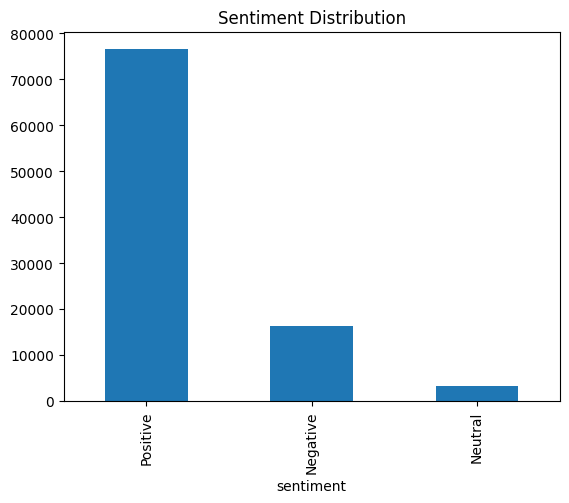

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

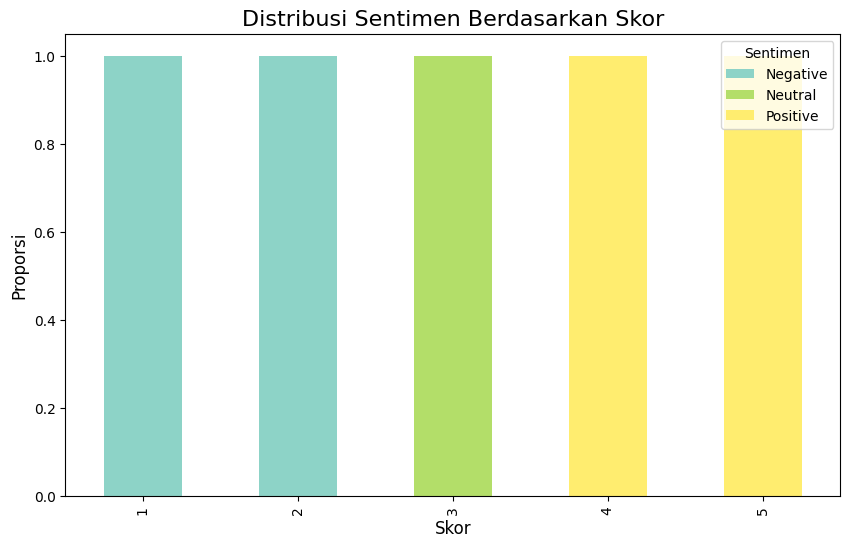

In [ ]:
#Korelasi antara skor dan sentimen
sentiment_score = df.groupby('score')['sentiment'].value_counts(normalize=True).unstack()
sentiment_score.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribusi Sentimen Berdasarkan Skor', fontsize=16)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Proporsi', fontsize=12)
plt.legend(title='Sentimen', loc='upper right')
plt.show()

score
5    70140
1    13562
4     6430
3     3394
2     2747
Name: count, dtype: int64


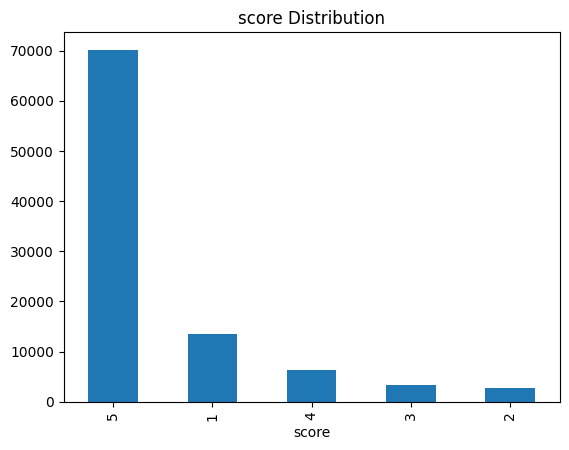

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print(df['score'].value_counts())
df['score'].value_counts().plot(kind='bar', title='score Distribution')
plt.show()

In [ ]:
df.columns

Index(['score', 'content', 'at', 'cleaned_content', 'sentiment'], dtype='object')

In [ ]:
# Menampilkan informasi awal tentang data
data_info = {
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 96273 entries, 0 to 99997
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   score            96273 non-null  int64 
 1   content          96273 non-null  object
 2   at               96273 non-null  object
 3   cleaned_content  96273 non-null  object
 4   sentiment        96273 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.4+ MB


{'head':    score                                            content  \
 0      4  Entahlah kenapa shopee yg sekarang pengirimann...   
 1      5                                             Mantap   
 2      5                                                Top   
 3      5  Kenapa Di Shoppe Ituh Selalu Sama Pengiriman N...   
 4      5                 Sangat puas dengan paket yg dkirim   
 
                     at                                    cleaned_content  \
 0  2024-12-16 08:39:35  shopee pengirimannya udah engga segercep pesen...   
 1  2024-12-16 08:39:13                                             mantap   
 2  2024-12-16 08:38:24                                                top   
 3  2024-12-16 08:37:59      shoppe ituh pengiriman samgat lambat perbaiki   
 4  2024-12-16 08:37:22                                  puas paket dkirim   
 
   sentiment  
 0  Positive  
 1  Positive  
 2  Positive  
 3  Positive  
 4  Positive  ,
 'info': None,
 'missing_values': score      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = df
# Mengisi nilai kosong di kolom 'cleaned_content' dengan data dari kolom 'content'
data['cleaned_content'].fillna(data['content'], inplace=True)

# Memisahkan fitur (X) dan label (y)
X = data['cleaned_content']
y = data['sentiment']

# Mengubah teks menjadi representasi numerik menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Membatasi hingga 5000 fitur
X_tfidf = tfidf.fit_transform(X)

# Membagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi data testing
y_pred = rf_model.predict(X_test)

# Mengevaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8828356271098416,
 '              precision    recall  f1-score   support\n\n    Negative       0.68      0.73      0.70      3109\n     Neutral       0.12      0.01      0.01       685\n    Positive       0.93      0.95      0.94     15461\n\n    accuracy                           0.88     19255\n   macro avg       0.58      0.56      0.55     19255\nweighted avg       0.86      0.88      0.87     19255\n')

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
y_pred=rf_model.predict(X_test)
print("Accuracy Score ", accuracy_score(y_test, y_pred))


print("Classification Report Sentiment:")
print(classification_report(y_test, y_pred))

Accuracy Score  0.8828356271098416
Classification Report Sentiment:
              precision    recall  f1-score   support

    Negative       0.68      0.73      0.70      3109
     Neutral       0.12      0.01      0.01       685
    Positive       0.93      0.95      0.94     15461

    accuracy                           0.88     19255
   macro avg       0.58      0.56      0.55     19255
weighted avg       0.86      0.88      0.87     19255



In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, classification_report
)

# Assuming y_test and model.classes_ are defined correctly
y_bin = label_binarize(y_test, classes=rf_model.classes_)
y_pred_proba = rf_model.predict_proba(X_test)

# Get predicted labels (highest probability) for roc_auc_score
y_pred_labels = rf_model.predict(X_test)
y_pred_bin = label_binarize(y_pred_labels, classes=rf_model.classes_)


# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)

# Using y_pred_bin (binarized predicted labels) instead of y_pred_proba
auc = roc_auc_score(y_bin, y_pred_bin, multi_class='ovr')

recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")

Accuracy: 0.8828
AUC: 0.7177
Recall: 0.5616
Precision: 0.5782
F1-Score: 0.5515
Kappa: 0.6198
MCC: 0.6231


Text(45.722222222222214, 0.5, 'True Label')

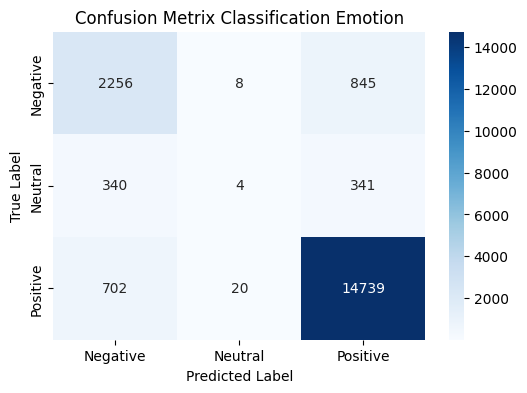

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Metrix Classification Emotion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')